# Neural Network
Neural network for binary classification.
<br>
The neural network is implemented in the `DNN.py` script in this folder.

In [1]:
import numpy as np
from tqdm import tqdm
from DNN import ThreeHiddenDNN
import matplotlib.pyplot as plt
from make_data import make_data, standardize

In [2]:
def plot_predictions(X, y_pred, title):
    fig, ax = plt.subplots(1,1, figsize=(5,8))
    predictions = np.argmax(y_pred, axis=1)
    reds = predictions == 1
    greens = predictions == 0
    ax.scatter(X[reds,0],X[reds,1],c = 'red', alpha = 0.3, s = 15)
    ax.scatter(X[greens,0],X[greens,1],c = 'green', alpha = 0.3, s = 15)
    ax.set_aspect('equal', 'box')
    plt.title(title)
    plt.show()

In [3]:
def plot_data(X, title):
    fig, ax = plt.subplots(1,1, figsize=(5,8))
    ax.scatter(X[0:n,0],X[0:n,1],c = 'red', alpha = 0.3, s = 15)
    ax.scatter(X[n:2*n,0],X[n:2*n,1],c = 'green', alpha = 0.3, s = 15)
    ax.set_aspect('equal', 'box')
    plt.title(title)
    plt.show()

In [4]:
def plot_preds(X, y_pred):
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax[0].scatter(X[0:n,0],X[0:n,1],c = 'red', alpha = 0.3, s = 15)
    ax[0].scatter(X[n:2*n,0],X[n:2*n,1],c = 'green', alpha = 0.3, s = 15)    
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            ax[1].scatter(X[i,0],X[i,1],c = 'red', alpha = 0.3, s = 15)
        else:
            ax[1].scatter(X[i,0],X[i,1],c = 'green', alpha = 0.3, s = 15)
    ax[0].set_aspect('equal', 'box')
    ax[1].set_aspect('equal', 'box')
    fig.suptitle('True vs. Predicted classes')
    ax[0].set_title('True classes')
    ax[1].set_title('Predicted classes')
    fig.show()

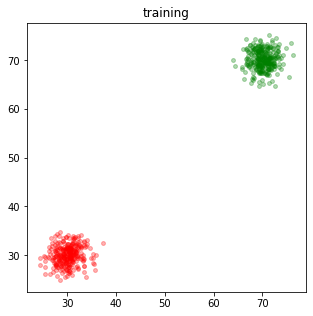

In [5]:
n = 300
example_nr = 1
noise = 0.2

X, T, x, dim = make_data(example_nr, n, noise)
plot_data(X, 'training')

## Standardizing Data

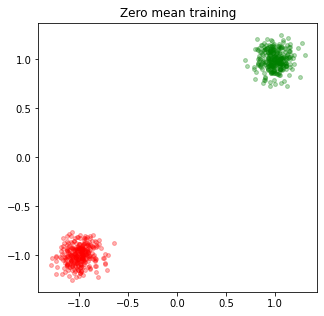

In [6]:
X_c = standardize(X)

plot_data(X_c, 'Zero mean training')

## Testing implementation

In [7]:
alpha = 0.005
model = ThreeHiddenDNN(step_size=alpha)

In [8]:
y_pred = model.forward(X_c)

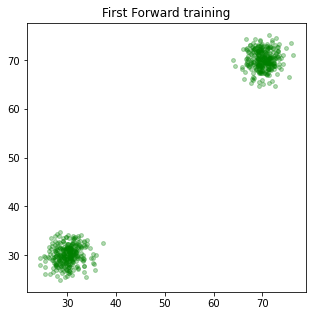

In [9]:
plot_predictions(X, y_pred, 'First Forward training')

### Network training - Backpropagation

In [25]:
def train_nn(X, T, n_epochs, lr):

    acc = []
    losss = []
    model = ThreeHiddenDNN(lr)

    for epoch in range(n_epochs):
        l = []
        Y = model.forward(X)
        l.append(np.sum(np.abs(T - Y)))  ## Needs to be correct loss function
        model.backpropagation(X=X_c, Y=Y, T=T)
        print('Epoch: ', epoch, 'Loss: ', np.mean(l))
        acc.append(100 - 100*np.mean(l))
        losss.append(np.mean(l))
    
    return model

Epoch:  0 Loss:  598.3971142980383
Epoch:  1 Loss:  637.8151363783618
Epoch:  2 Loss:  634.4804881553807
Epoch:  3 Loss:  596.9842031857947
Epoch:  4 Loss:  595.4177578296943
Epoch:  5 Loss:  600.3402790876967
Epoch:  6 Loss:  604.2531530836711
Epoch:  7 Loss:  607.3134965417847
Epoch:  8 Loss:  609.4315802312067
Epoch:  9 Loss:  610.7193926012901
Epoch:  10 Loss:  611.1716383698357
Epoch:  11 Loss:  610.654836398288
Epoch:  12 Loss:  609.1691575025427
Epoch:  13 Loss:  606.5262513573721
Epoch:  14 Loss:  602.8984853292775
Epoch:  15 Loss:  599.371373973755
Epoch:  16 Loss:  597.2024320091324
Epoch:  17 Loss:  595.7542403042205
Epoch:  18 Loss:  594.6258383557789
Epoch:  19 Loss:  593.6452828972862
Epoch:  20 Loss:  592.7676888701691
Epoch:  21 Loss:  591.9206369634294
Epoch:  22 Loss:  591.1369387630821
Epoch:  23 Loss:  590.4384533256999
Epoch:  24 Loss:  589.8325619494855
Epoch:  25 Loss:  589.3479613821181
Epoch:  26 Loss:  589.0309501921671
Epoch:  27 Loss:  588.9179523318405
Epoc

/var/folders/bb/6zx8vn690fd_kml8spjg6j8h0000gn/T/ipykernel_45480/2454342255.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


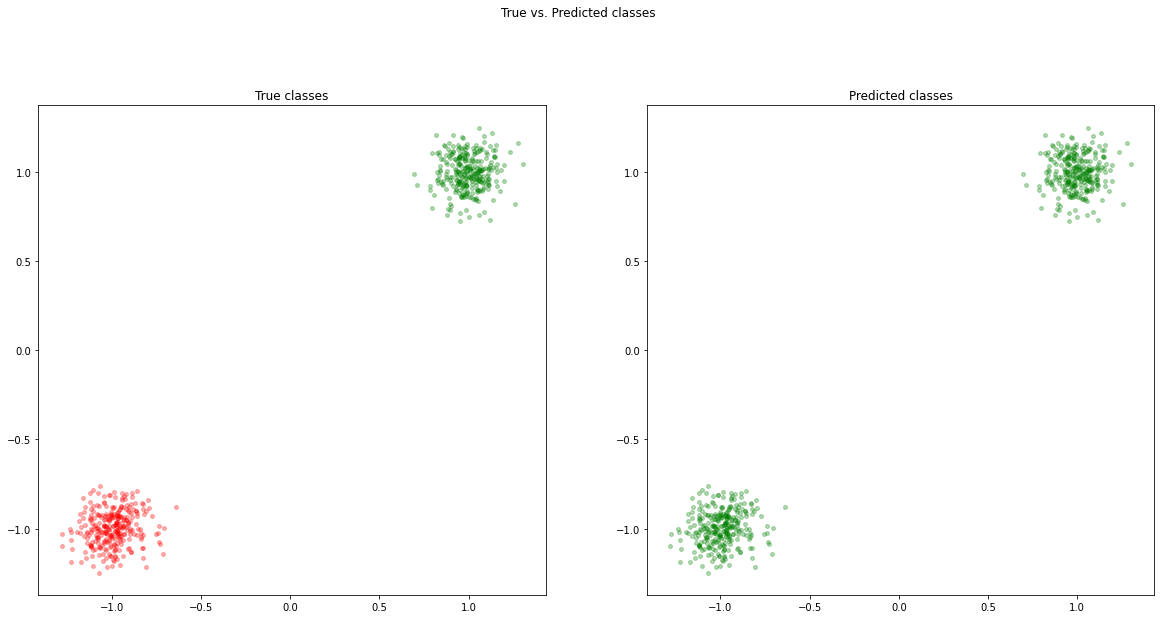

In [33]:

model = train_nn(X=X_c, T=T, n_epochs=1000, lr=0.001)
y_pred = model.forward(X=X_c)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)



plot_preds(X=X_c, y_pred=y_pred)

#### Accuracy

In [31]:
sum(y_pred == np.argmax(T, axis=1))/T.shape[0]

0.88

## Batch optimization

# Variable number of layers and hidden units